In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/for_charts_and_graphs/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head(2)

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."


In [3]:
zipcodes.rename(columns={'zip':'zip_code'}, inplace=True)

In [4]:
zipcodes.head(2)

,zip_code,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."


In [5]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

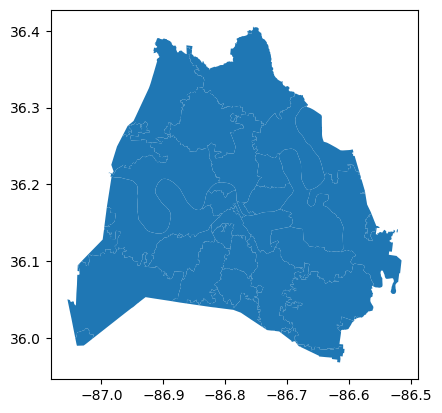

In [6]:
zipcodes.plot()

In [7]:
mnpd_incidents = pd.read_csv('../data/cleaned_data/mnpd_incidents_cleaned.csv')

In [8]:
mnpd_incidents = mnpd_incidents.drop('mapped_location', axis=1)

In [9]:
mnpd_incidents['geometry'] = mnpd_incidents.apply(lambda x: Point((x.longitude, 
                                                         x.latitude)), 
                                        axis=1)

In [10]:
mnpd_incidents.head()

,Unnamed: 0,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,latitude,longitude,...,victim_number,domestic_related,victim_type,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,violence_class,geometry
0,0,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2018-03-31 12:21:00,2018-03-31 19:41:00,36.042,-86.713,...,1.0,False,B,BUSINESS,NaN,NaN,NaN,NaN,NON-VIOLENT,POINT (-86.713 36.042)
1,2,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2017-12-16 18:30:00,2017-12-16 22:44:00,36.178,-86.586,...,1.0,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,NON-VIOLENT,POINT (-86.586 36.178)
2,14,S,SUSPECT,A,CLEARED BY ARREST,Closed,2017-02-07 16:00:00,2017-02-07 17:32:00,36.200,-86.619,...,2.0,False,B,BUSINESS,NaN,NaN,NaN,NaN,NON-VIOLENT,POINT (-86.619 36.2)
3,19,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2017-05-18 05:00:00,2017-05-18 06:25:00,36.214,-86.794,...,1.0,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,VIOLENT,POINT (-86.794 36.214)
4,22,S,SUSPECT,A,CLEARED BY ARREST,Closed,2016-01-08 00:45:00,2016-01-08 02:54:00,36.151,-86.768,...,1.0,False,S,SOCIETY,NaN,NaN,NaN,NaN,NON-VIOLENT,POINT (-86.768 36.151)


In [11]:
mnpd_incidents_gdf = gpd.GeoDataFrame(mnpd_incidents, crs=zipcodes.crs, geometry=mnpd_incidents['geometry'])

In [12]:
mnpd_incidents_gdf.head()

,Unnamed: 0,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,latitude,longitude,...,victim_number,domestic_related,victim_type,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,violence_class,geometry
0,0,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2018-03-31 12:21:00,2018-03-31 19:41:00,36.042,-86.713,...,1.0,False,B,BUSINESS,NaN,NaN,NaN,NaN,NON-VIOLENT,POINT (-86.71300 36.04200)
1,2,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2017-12-16 18:30:00,2017-12-16 22:44:00,36.178,-86.586,...,1.0,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,NON-VIOLENT,POINT (-86.58600 36.17800)
2,14,S,SUSPECT,A,CLEARED BY ARREST,Closed,2017-02-07 16:00:00,2017-02-07 17:32:00,36.200,-86.619,...,2.0,False,B,BUSINESS,NaN,NaN,NaN,NaN,NON-VIOLENT,POINT (-86.61900 36.20000)
3,19,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2017-05-18 05:00:00,2017-05-18 06:25:00,36.214,-86.794,...,1.0,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,VIOLENT,POINT (-86.79400 36.21400)
4,22,S,SUSPECT,A,CLEARED BY ARREST,Closed,2016-01-08 00:45:00,2016-01-08 02:54:00,36.151,-86.768,...,1.0,False,S,SOCIETY,NaN,NaN,NaN,NaN,NON-VIOLENT,POINT (-86.76800 36.15100)


In [14]:
zipcodes = zipcodes[['zip_code', 'po_name', 'geometry']]

In [15]:
incidents_by_zip = gpd.sjoin(mnpd_incidents_gdf, zipcodes, predicate = 'within')

In [16]:
incidents_by_zip.head()

,Unnamed: 0,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,latitude,longitude,...,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,violence_class,geometry,index_right,zip_code_right,po_name
0,0,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2018-03-31 12:21:00,2018-03-31 19:41:00,36.042,-86.713,...,BUSINESS,NaN,NaN,NaN,NaN,NON-VIOLENT,POINT (-86.71300 36.04200),49,37211,NASHVILLE
9,30,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2018-04-13 02:49:00,2018-04-13 05:42:00,36.084,-86.716,...,INDIVIDUAL (18 AND OVER),M,W,Hispanic,RESIDENT,VIOLENT,POINT (-86.71600 36.08400),49,37211,NASHVILLE
15,43,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2016-12-09 13:15:00,2016-12-09 15:14:00,36.082,-86.714,...,SOCIETY,NaN,NaN,NaN,NaN,NON-VIOLENT,POINT (-86.71400 36.08200),49,37211,NASHVILLE
16,45,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2018-09-28 13:00:00,2018-10-01 15:28:00,36.089,-86.712,...,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,NON-VIOLENT,POINT (-86.71200 36.08900),49,37211,NASHVILLE
31,95,S,SUSPECT,A,CLEARED BY ARREST,Closed,2017-06-28 15:45:00,2017-06-28 15:45:00,36.083,-86.718,...,SOCIETY,NaN,NaN,NaN,NaN,NON-VIOLENT,POINT (-86.71800 36.08300),49,37211,NASHVILLE


<Axes: >

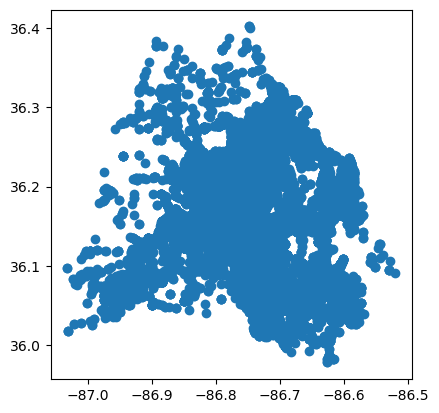

In [17]:
incidents_by_zip.plot()

C:\Users\Ed\anaconda3\envs\geospatial\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


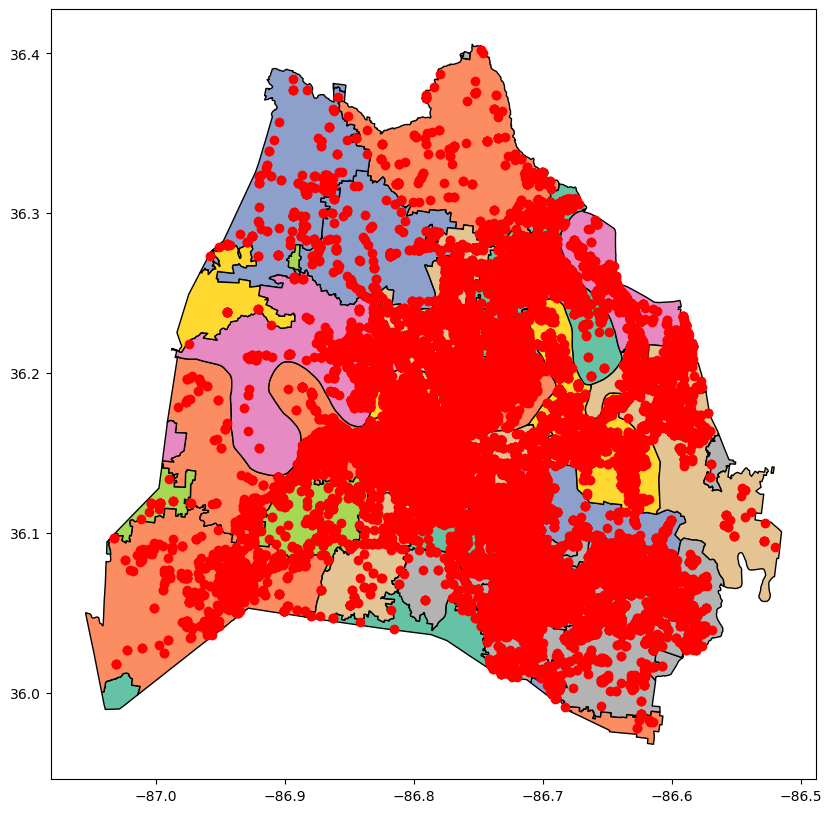

In [30]:
ax = zipcodes.plot(column='zip_code',
                   figsize=(10,10),
                   color='white', 
                   edgecolor='black',
                  cmap='Set2')

incidents_by_zip.plot(ax=ax, color='red')

plt.show()

### Interlude:
Now that we've got the basic mapping down, let's use it to map the incidents by Top 10 Incidents and Top 10 Violent Incidents

In [100]:
top_zips_by_total_incidents = ['37207',
 '37211',
 '37115',
 '37208',
 '37210',
 '37013',
 '37209',
 '37203',
 '37206',
 '37214']

In [26]:
top_zips_by_violent_incidents = ['37207',
 '37211',
 '37013',
 '37115',
 '37208',
 '37206',
 '37203',
 '37217',
 '37210',
 '37209']

In [110]:
zips_by_total_incidents = incidents_by_zip.loc[incidents_by_zip['zip_code_right'].isin(top_zips_by_total_incidents)]

In [111]:
zips_by_total_incidents['zip_code_right'].unique()

array(['37211', '37207', '37210', '37206', '37209', '37013', '37208',
       '37115', '37214', '37203'], dtype=object)

In [98]:
zip_by_violent_incidents = 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   zip_code  56 non-null     object  
 1   po_name   56 non-null     object  
 2   geometry  56 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 1.4+ KB


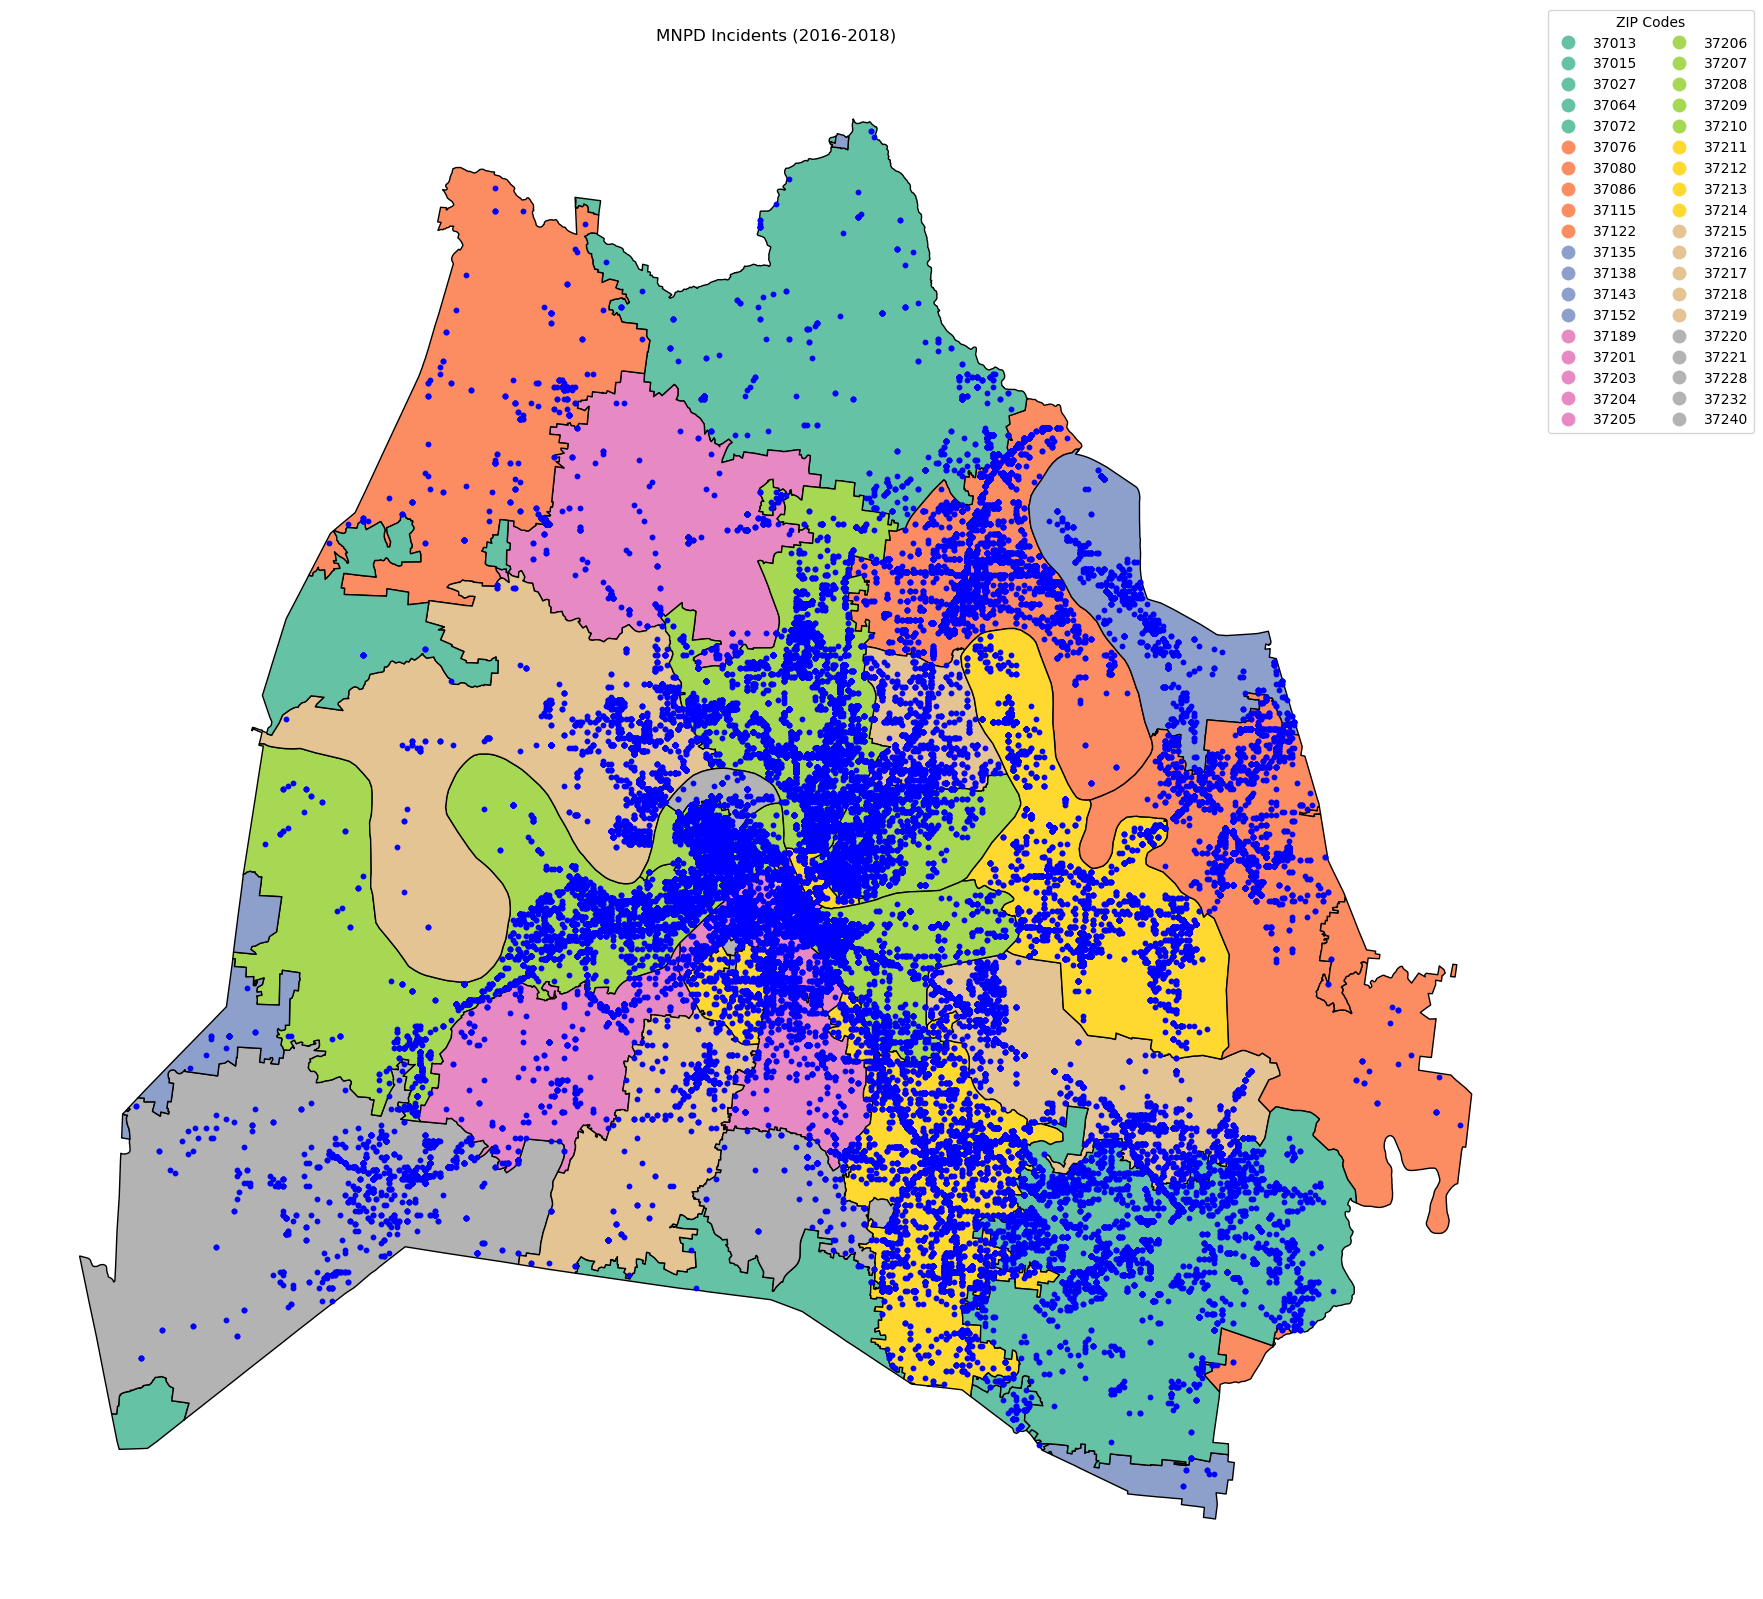

In [141]:
leg_kwds = {'title': 'ZIP Codes', 'loc': 'upper left', 
           'bbox_to_anchor': (1, 1.03), 'ncol': 2}

ax = zipcodes.plot(column='zip_code',
                   figsize=(20,20), 
                   edgecolor='black',
                   legend=True,
                   legend_kwds=leg_kwds,
                   cmap='Set2')
ax.axis('off')
incidents_by_zip.plot(ax=ax,
                      color='blue',
                      markersize=10)
plt.title('MNPD Incidents (2016-2018)')
plt.show()

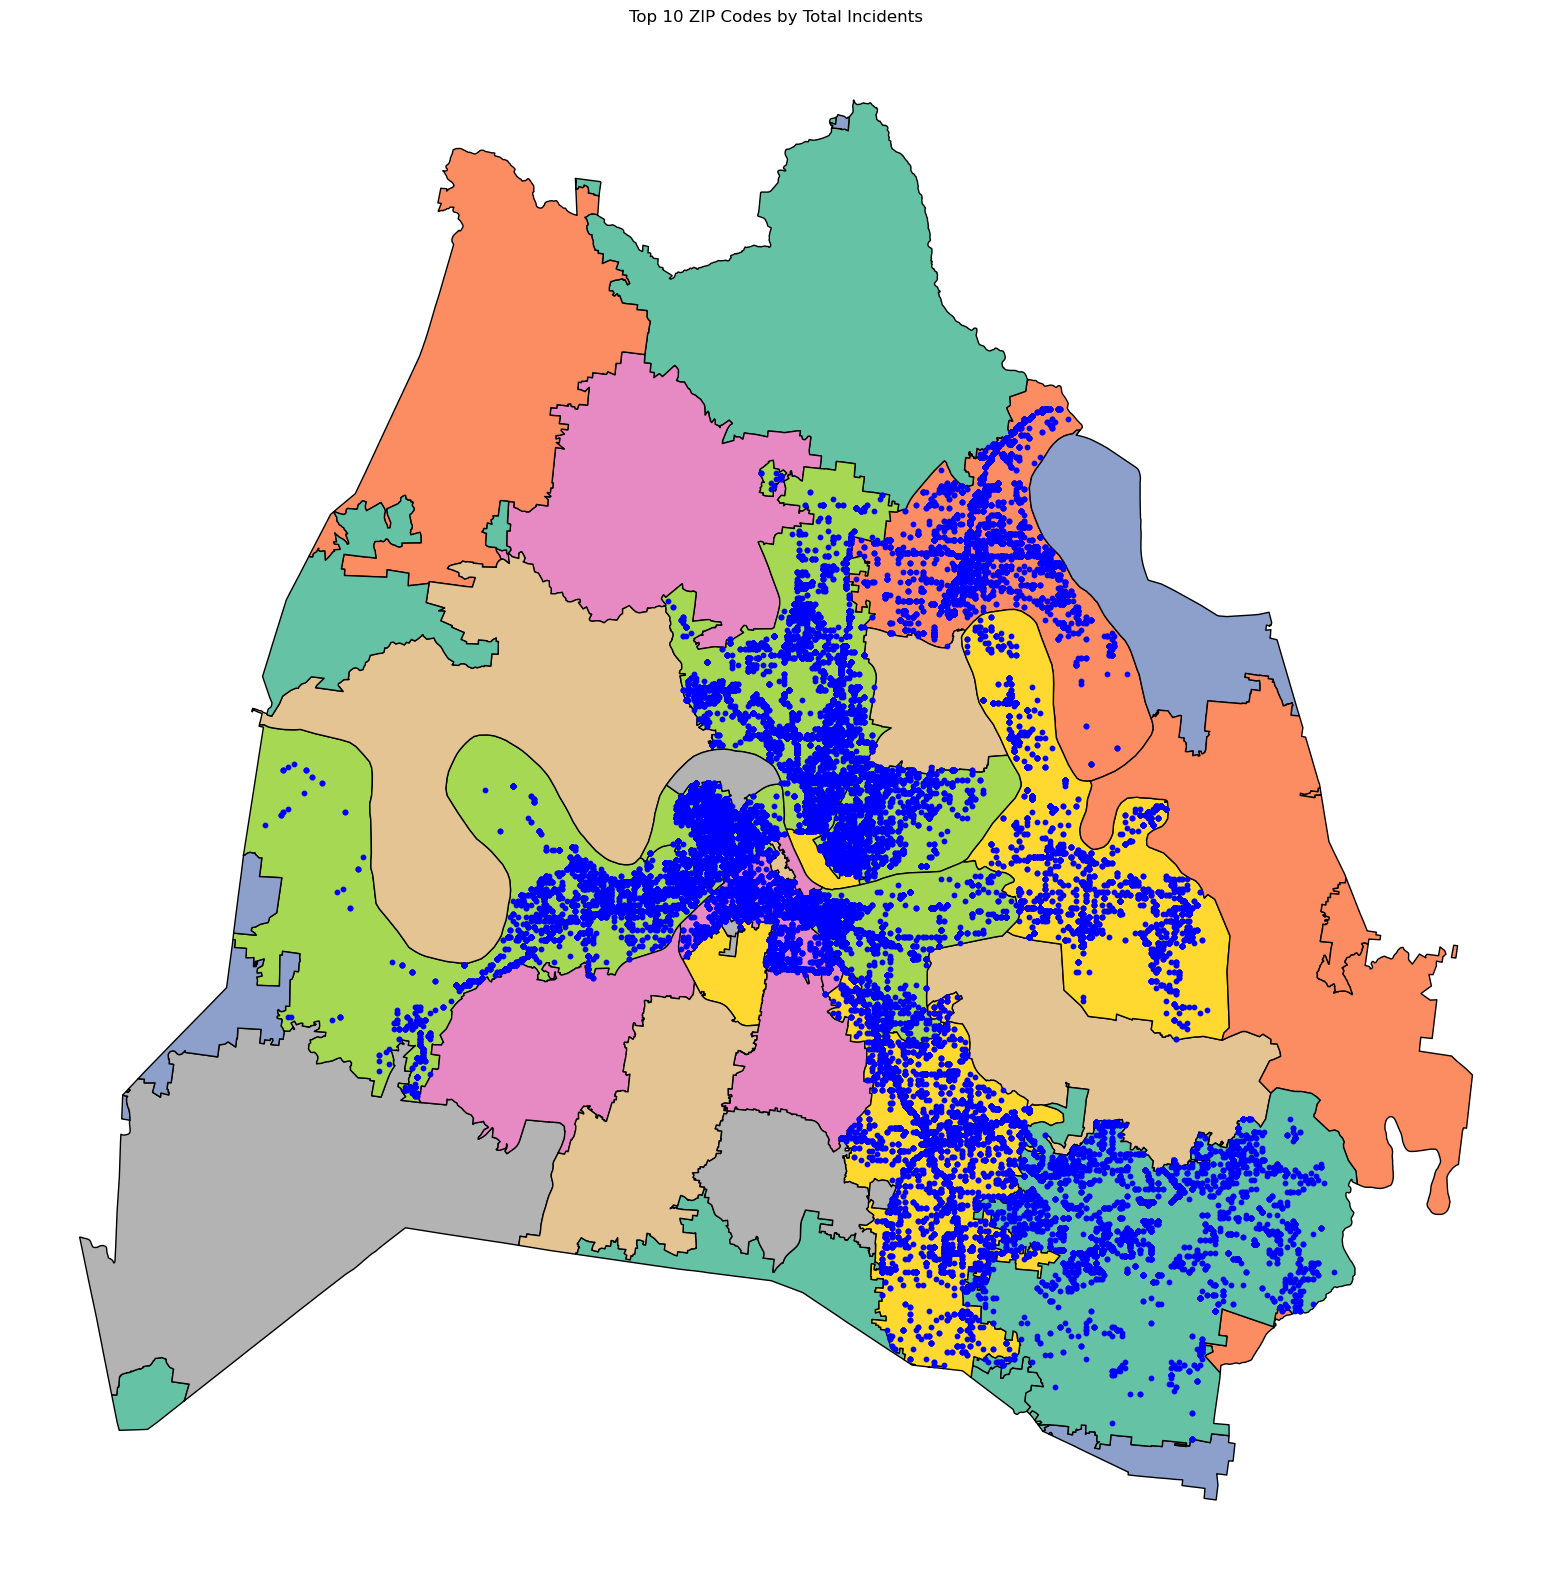

In [142]:
leg_kwds = {'title': 'ZIP Codes', 'loc': 'upper left', 
           'bbox_to_anchor': (1, 1.03), 'ncol': 2}

ax = zipcodes.plot(column='zip_code',
                   figsize=(20,20), 
                   edgecolor='black',
#                   legend=True,
#                   legend_kwds=leg_kwds,
                   cmap='Set2')
ax.axis('off')

zips_by_total_incidents.plot(ax=ax,
                             color='blue',
                            markersize=10)
plt.title('Top 10 ZIP Codes by Total Incidents')
plt.show()

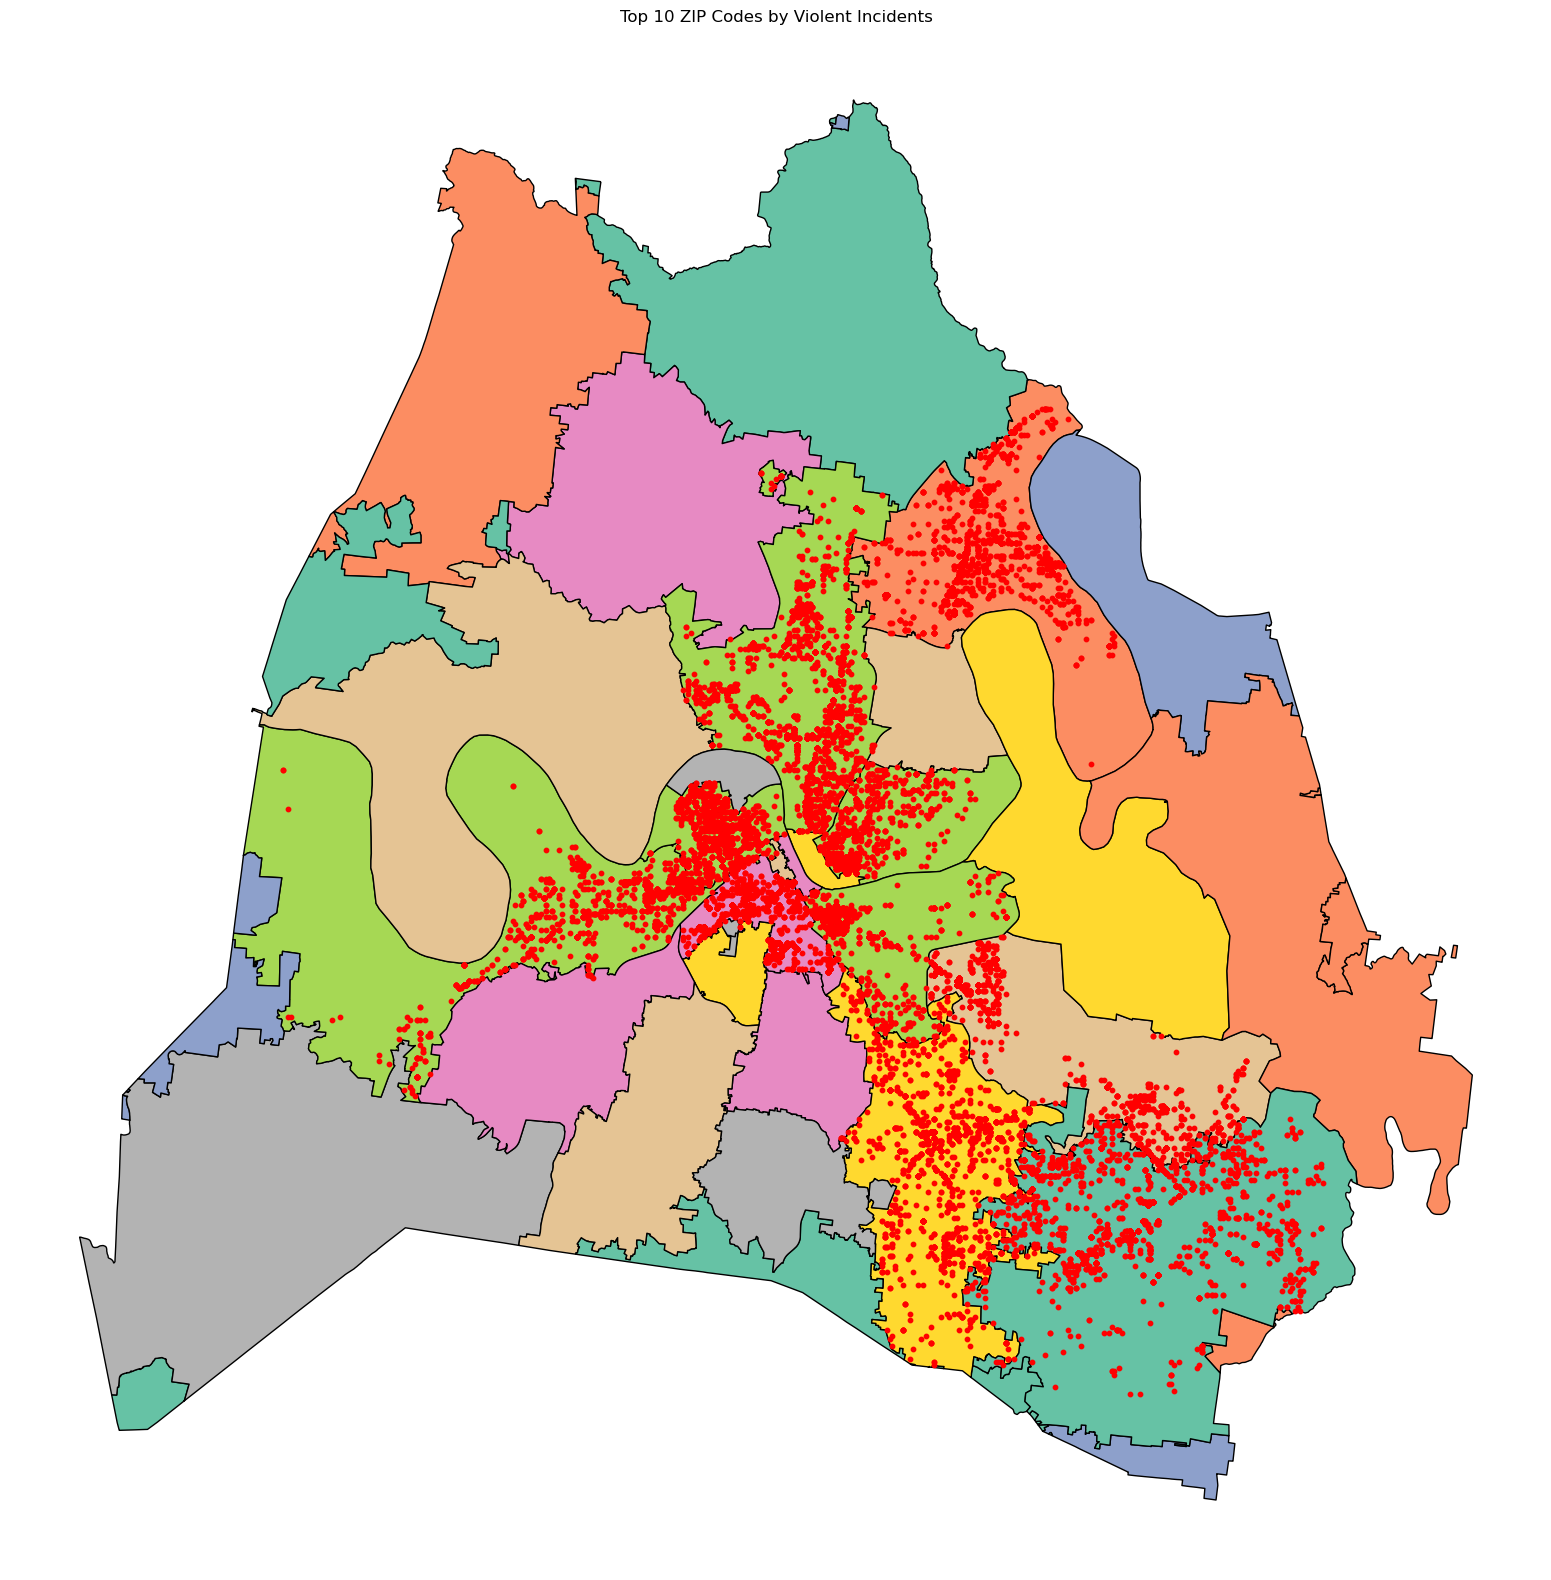

In [143]:
leg_kwds = {'title': 'ZIP Codes', 'loc': 'upper left', 
           'bbox_to_anchor': (1, 1.03), 'ncol': 2}

ax = zipcodes.plot(column='zip_code',
                   figsize=(20,20), 
                   edgecolor='black',
#                   legend=True,
#                   legend_kwds=leg_kwds,
                   cmap='Set2')
ax.axis('off')

zips_by_violent_incidents.plot(ax=ax,
                             color='red',
                            markersize=10)
plt.title('Top 10 ZIP Codes by Violent Incidents')
plt.show()